In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('sniff_data/25_min.csv')

In [2]:
df.shape

(84874, 7)

In [3]:
df_group = df.groupby('Protocol').Source.count()
df_group

Protocol
ARP          100
DNS          659
HTTP         714
ICMP           1
IGMPv2       158
MDNS          46
NTP           12
OCSP          10
SSDP         509
TCP        57666
TLSv1         14
TLSv1.2    12129
TLSv1.3     3746
UDP         9110
Name: Source, dtype: int64

In [4]:
df_group.sort_values()

Protocol
ICMP           1
OCSP          10
NTP           12
TLSv1         14
MDNS          46
ARP          100
IGMPv2       158
SSDP         509
DNS          659
HTTP         714
TLSv1.3     3746
UDP         9110
TLSv1.2    12129
TCP        57666
Name: Source, dtype: int64

66.7691478729248
Protocol
TCP        42790788
TLSv1.2    16496751
UDP         5961339
TLSv1.3     3614168
HTTP         864138
SSDP         176720
DNS           72054
MDNS           9160
TLSv1          8162
IGMPv2         7268
Name: Length, dtype: int64


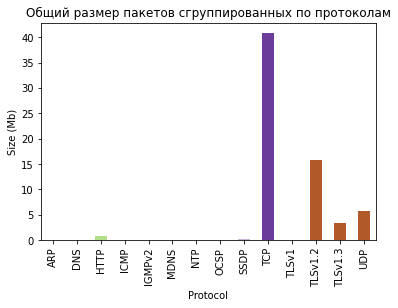

In [5]:
df_sum_length = df.groupby('Protocol').Length.sum()
df_sum_length_mb = df_sum_length / (1024 * 1024)
print(sum(df_sum_length_mb))
print(df_sum_length.sort_values(ascending=False).head(10))
axes = df_sum_length_mb.plot.bar(title='Общий размер пакетов сгруппированных по протоколам', color=plt.cm.Paired(np.arange(len(df))))
axes.set_xlabel('Protocol')
axes.set_ylabel('Size (Mb)')
axes

Protocol
TCP        57666
TLSv1.2    12129
UDP         9110
TLSv1.3     3746
HTTP         714
DNS          659
SSDP         509
IGMPv2       158
ARP          100
MDNS          46
Name: Source, dtype: int64


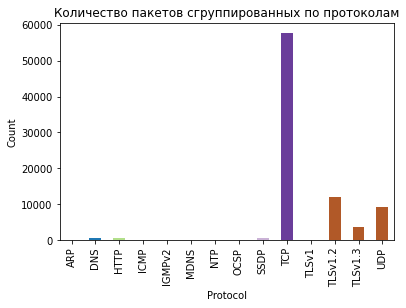

In [6]:
df_p = df.groupby('Protocol').Source.count()
print(df_p.sort_values(ascending=False).head(10))
axes = df_p.plot(kind='bar', color=plt.cm.Paired(np.arange(len(df))), title='Количество пакетов сгруппированных по протоколам')
axes.set_xlabel('Protocol')
axes.set_ylabel('Count')
axes

Protocol
TLSv1.2    1360.108088
HTTP       1210.277311
TLSv1.3     964.807261
TCP         742.045365
OCSP        662.800000
UDP         654.373106
TLSv1       583.000000
SSDP        347.190570
MDNS        199.130435
DNS         109.338392
NTP          90.000000
ICMP         70.000000
IGMPv2       46.000000
ARP          42.000000
dtype: float64


Text(0, 0.5, 'Size (bytes)')

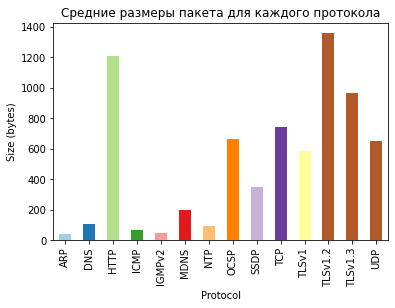

In [7]:
df_a_p = df_sum_length / df_p
print(df_a_p.sort_values(ascending=False).head(20))
axes = df_a_p.plot(kind='bar', color=plt.cm.Paired(np.arange(len(df))), title='Средние размеры пакета для каждого протокола')
axes.set_xlabel('Protocol')
axes.set_ylabel('Size (bytes)')